In [220]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [221]:
# reading the Haberman's cancer survival data
data=pd.read_csv("haberman.csv",header=None)

In [222]:
data.columns=["Age","Year","Node","S_S"]
s=data["S_S"]
s[s==1]="One"
s[s==2]="Two"

In [223]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age     306 non-null int64
Year    306 non-null int64
Node    306 non-null int64
S_S     306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB
None


In [224]:
print(data['S_S'].value_counts())

One    225
Two     81
Name: S_S, dtype: int64


In [225]:
data['S_S'].unique()

array(['One', 'Two'], dtype=object)

In [226]:
print("About the data : ")
print("The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's \
Billings Hospital Survival status on the survival of patients who had undergone surgery for breast cancer.")
print("We have 3 features :")
print("1. Age : Age of patient at time of operation ")
print("2. Year : Patient's year of operation (year - 1900)")
print("3. Node : Number of positive axillary nodes detected")
print("We have 1 Class Label : ")
print("S_S : Survival status")
print("There are two classes :")
print(" (i) One = the patient survived 5 years or longer")
print("(ii) Two = the patient died within 5 year")
print("There  are total 306 Observations")
print("Out of which 225 Observations are related to Class One")
print("And 81 Observations are related to Class Two")
print("\nData Sample :\n\n")
print(data.head())

print(data.tail())

About the data : 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital Survival status on the survival of patients who had undergone surgery for breast cancer.
We have 3 features :
1. Age : Age of patient at time of operation 
2. Year : Patient's year of operation (year - 1900)
3. Node : Number of positive axillary nodes detected
We have 1 Class Label : 
S_S : Survival status
There are two classes :
 (i) One = the patient survived 5 years or longer
(ii) Two = the patient died within 5 year
There  are total 306 Observations
Out of which 225 Observations are related to Class One
And 81 Observations are related to Class Two

Data Sample :


   Age  Year  Node  S_S
0   30    64     1  One
1   30    62     3  One
2   30    65     0  One
3   31    59     2  One
4   31    65     4  One
     Age  Year  Node  S_S
301   75    62     1  One
302   76    67     0  One
303   77    65     3  One
304   78    65     1  Two
305

In [227]:
# Objective
print("Our objective is to find the important features that can help in Classifying the data")

Our objective is to find the important features that can help in Classifying the data


In [228]:
print("Descriptive Statistics of Data\n")
print(data.drop("S_S",axis=1).describe())

Descriptive Statistics of Data

              Age        Year        Node
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [229]:
print("Descriptive Statistics of Data related to Class One\n")
o=data[data["S_S"]=="One"]
print(o.describe())

Descriptive Statistics of Data related to Class One

              Age        Year        Node
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000


In [230]:
print("Descriptive Statistics of Data related to Class Two\n")
t=data[data["S_S"]=="Two"]
print(t.describe())

Descriptive Statistics of Data related to Class Two

             Age       Year       Node
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000


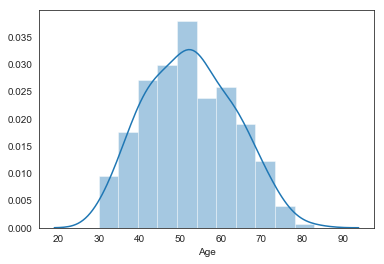

In [231]:
sns.set_style("white")
sns.distplot(data["Age"])
plt.show()

In [232]:
print("Conclusion:")
print("Most patients are of Age between 50 to 55")
print("Very few patients are of age 80 to 85")

Conclusion:
Most patients are of Age between 50 to 55
Very few patients are of age 80 to 85


In [233]:
# Now we will perform Univariate Analysis to understand which features are useful towards Classification

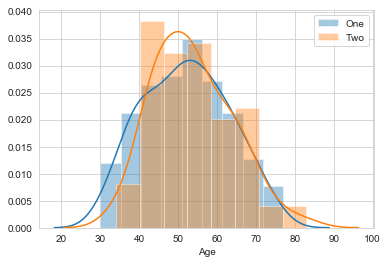

In [234]:
sns.set_style("whitegrid")
sns.distplot(o["Age"],label="One")
sns.distplot(t["Age"],label="Two")
plt.legend()
plt.show()

In [235]:
print("Conclusion:")
print("Highest Survival rate is of Age 30 to 40 patients")

Conclusion:
Highest Survival rate is of Age 30 to 40 patients


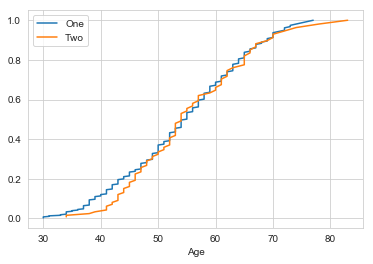

In [236]:
# Cumulative Distribution of Age in Class One and Two
x=o["Age"].sort_values()
y=t["Age"].sort_values()
plt.plot(x,np.cumsum(x)/np.sum(x),label="One")
plt.plot(y,np.cumsum(y)/np.sum(y),label="Two")
plt.xlabel("Age")
plt.legend()
plt.show()

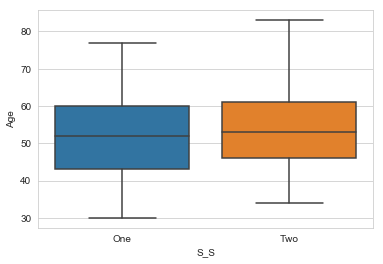

In [237]:
sns.set_style("whitegrid")
sns.boxplot(x="S_S",y="Age",data=data)
plt.show()

In [238]:
print("Conclusion :")
print("No person of age greater than 77 could not survived")
print("Every person of age less 34 survived")

Conclusion :
No person of age greater than 77 could not survived
Every person of age less 34 survived


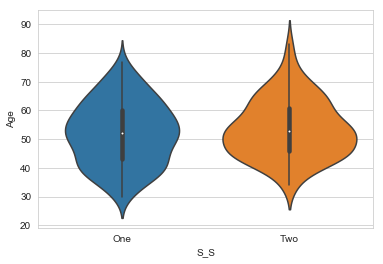

In [239]:
sns.set_style("whitegrid")
sns.violinplot(x="S_S",y="Age",data=data)
plt.show()

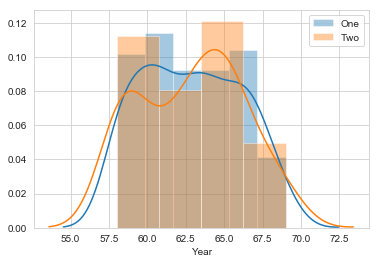

In [240]:
sns.set_style("whitegrid")
sns.distplot(o["Year"],label="One")
sns.distplot(t["Year"],label="Two")
plt.legend()
plt.show()

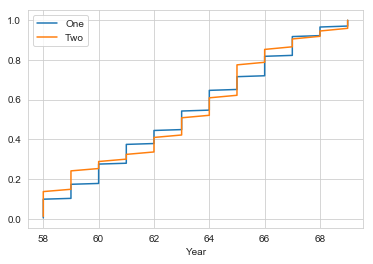

In [241]:
# Cumulative Distribution of Year in Class One and Two
x=o["Year"].sort_values()
y=t["Year"].sort_values()
plt.plot(x,np.cumsum(x)/np.sum(x),label="One")
plt.plot(y,np.cumsum(y)/np.sum(y),label="Two")
plt.xlabel("Year")
plt.legend()
plt.show()

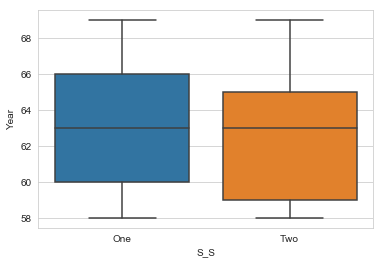

In [242]:
sns.set_style("whitegrid")
sns.boxplot(x="S_S",y="Year",data=data)
plt.show()

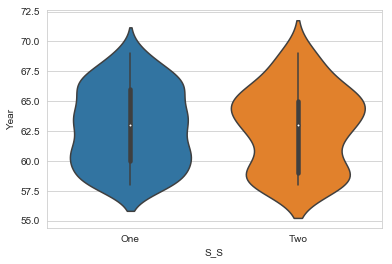

In [243]:
sns.set_style("whitegrid")
sns.violinplot(x="S_S",y="Year",data=data)
plt.show()

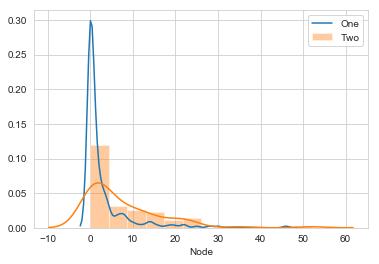

In [244]:
sns.set_style("whitegrid")
sns.distplot(o["Node"],label="One",hist=False)
sns.distplot(t["Node"],label="Two")
plt.legend()
plt.show()

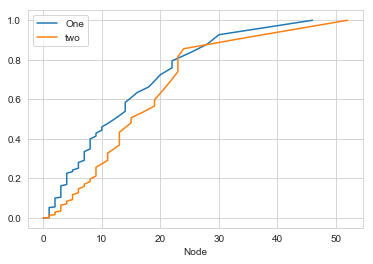

In [245]:
# Cumulative Distribution of Nodes in Class One and Two
x=o["Node"].sort_values()
y=t["Node"].sort_values()
plt.plot(x,np.cumsum(x)/np.sum(x),label="One")
plt.plot(y,np.cumsum(y)/np.sum(y),label="two")
plt.xlabel("Node")
plt.legend()
plt.show()

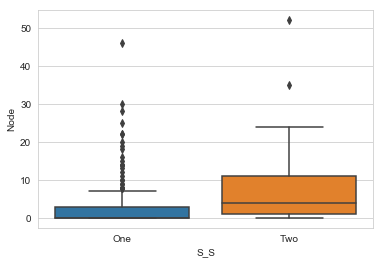

In [246]:
sns.set_style("whitegrid")
sns.boxplot(x="S_S",y="Node",data=data)
plt.show()

In [247]:
(t["Node"]>4).value_counts()

False    42
True     39
Name: Node, dtype: int64

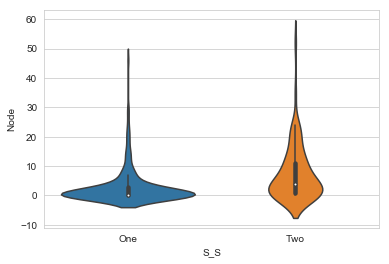

In [248]:
sns.set_style("whitegrid")
sns.violinplot(x="S_S",y="Node",data=data)
plt.show()

In [250]:
print("Conclusion :")
print("Mostly patients who survived had less than 5 positive axillary nodes")
print("Around 50% patients who could not survive had more than 4 positive axillary nodes")

Conclusion :
Mostly patients who survived had less than 5 positive axillary nodes
Around 50% patients who could not survive had more than 4 positive axillary nodes


In [251]:
# Bivariate Analysis

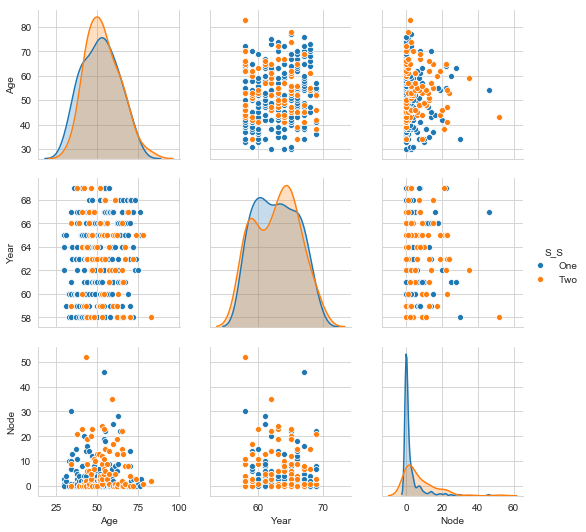

In [252]:
# Pair Plot
sns.pairplot(data,hue="S_S")
plt.show()

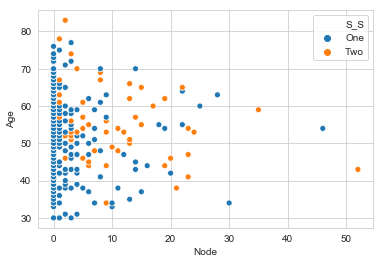

In [253]:
# Scatter Plot between Node and Age
sns.scatterplot("Node","Age",hue="S_S",data=data)
plt.show()

In [ ]:
print("Conclusion :")
print("Scatter Plot between Age and Node gives better separation between the Survived and not survived patients")

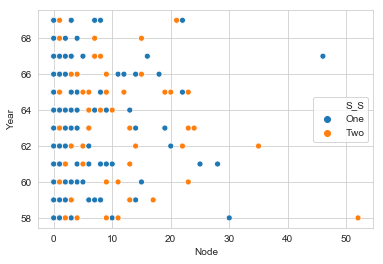

In [140]:
# Scatter Plot between Node and Year
sns.scatterplot("Node","Year",hue="S_S",data=data)
plt.show()

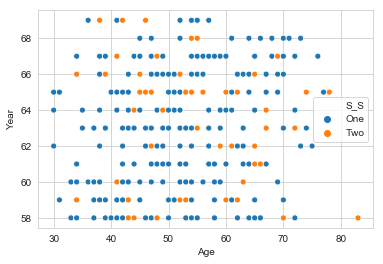

In [141]:
# Scatter Plot between Age nad Year
sns.scatterplot("Age","Year",hue="S_S",data=data)
plt.show()

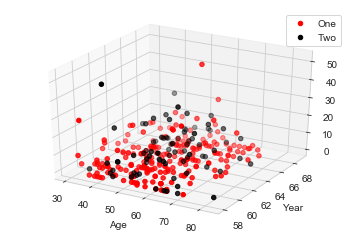

In [142]:
# 3D plot of Data
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(o['Age'],o["Year"],o["Node"],label="One",c='r')
ax.scatter3D(t['Age'],t["Year"],t["Node"],label="Two",c='k')
plt.xlabel("Age")
plt.ylabel("Year")
plt.legend()
plt.show()

In [219]:
print("Observations: ")
print("Data is imbalanced and Randomly Distributed")
print("Scatter Plot between Age and Node gives better separation between the Survived and not survived patients")
print("Node and Age are the most important features")
print("Most patients are of Age between 50 to 55")
print("Very few patients are of age 80 to 85")
print("Highest Survival rate is of Age 30 to 40 patients")
print("No person of age greater than 77 could not survived")
print("Every person of age less 34 survived")
print("Mostly patients who survived had less than 5 positive axillary nodes")
print("Around 50% patients who could not survive had more than 4 positive axillary nodes")

Observations: 
Data is imbalanced and Randomly Distributed
Scatter Plot between Age and Node gives better separation between the Survived and not survived patients
Node and Age are the most important features
Most patients are of Age between 50 to 55
Very few patients are of age 80 to 85
Highest Survival rate is of Age 30 to 40 patients
No person of age greater than 77 could not survived
Every person of age less 34 survived
Mostly patients who survived had less than 5 positive axillary nodes
Around 50% patients who could not survive had more than 4 positive axillary nodes
